In [1]:
import pandas as pd
import os
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/geramukaeva/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1


In [3]:
dataset_path = '/Users/geramukaeva/.cache/kagglehub/datasets/alexteboul/diabetes-health-indicators-dataset/versions/1/diabetes_012_health_indicators_BRFSS2015.csv'

if os.path.exists(dataset_path):
    diabetes_data_raw = pd.read_csv(dataset_path)

In [4]:
diabetes_data_raw.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
diabetes_data_raw.shape

(253680, 22)

In [6]:
diabetes_data_raw.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [7]:
diabetes_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
diabetes_data_raw[diabetes_data_raw.isna().any(axis=1)]

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


In [9]:
[diabetes_data_raw.duplicated()]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 253675    False
 253676    False
 253677    False
 253678    False
 253679    False
 Length: 253680, dtype: bool]

In [10]:
# переименование столбцов

diabetes_data_raw.rename(columns=
                               {'Diabetes_012': 'diabetes_012',
                                'HighBP': 'high_blood_pressure',
                                'HighChol': 'high_cholesterol',
                                'CholCheck': 'cholesterol_check',
                                'BMI': 'body_mass_index',
                                'Smoker': 'smoker',
                                'Stroke': 'stroke',
                                'HeartDiseaseorAttack': 'heart_disease_or_attack',
                                'PhysActivity': 'physical_activity',
                                'Fruits': 'fruits',
                                'Veggies': 'veggies',
                                'HvyAlcoholConsump': 'heavy_alcohol_consump',
                                'AnyHealthcare': 'any_health_care',
                                'NoDocbcCost': 'no_doc_bc_cost',
                                'GenHlth': 'general_health',
                                'MentHlth': 'mental_health',
                                'PhysHlth': 'physical_health',
                                'DiffWalk': 'diff_walking',
                                'Sex': 'sex',
                                'Age': 'age',
                                'Education': 'education',
                                'Income': 'income_usd'                                                    
                               },
                               inplace=True)

In [11]:
diabetes_data_raw.head()

,diabetes_012,high_blood_pressure,high_cholesterol,cholesterol_check,body_mass_index,smoker,stroke,heart_disease_or_attack,physical_activity,fruits,...,any_health_care,no_doc_bc_cost,general_health,mental_health,physical_health,diff_walking,sex,age,education,income_usd
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [12]:
diabetes_data_raw['diabetes_desc'] = diabetes_data_raw['diabetes_012'].map({0: 'нет', 1: 'предиабет', 2: 'диабет'})
diabetes_data_raw['high_blood_pressure_desc'] = diabetes_data_raw['high_blood_pressure'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['high_cholesterol_desc'] = diabetes_data_raw['high_cholesterol'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['cholesterol_check_desc'] = diabetes_data_raw['cholesterol_check'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['smoker_desc'] = diabetes_data_raw['smoker'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['stroke_desc'] = diabetes_data_raw['stroke'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['heart_disease_or_attack_desc'] = diabetes_data_raw['heart_disease_or_attack'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['physical_activity_desc'] = diabetes_data_raw['physical_activity'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['fruits_desc'] = diabetes_data_raw['fruits'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['veggies_desc'] = diabetes_data_raw['veggies'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['heavy_alcohol_consump_desc'] = diabetes_data_raw['heavy_alcohol_consump'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['any_health_care_desc'] = diabetes_data_raw['any_health_care'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['no_doc_bc_cost_desc'] = diabetes_data_raw['no_doc_bc_cost'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['general_health_desc'] = diabetes_data_raw['general_health'].map({1: 'отлично', 2: 'очень хорошо',3: 'хорошо', 4: 'нормально', 5: 'плохо'})
diabetes_data_raw['diff_walking_desc'] = diabetes_data_raw['diff_walking'].map({0: 'нет', 1: 'да'})
diabetes_data_raw['sex_desc'] = diabetes_data_raw['sex'].map({0: 'женщины', 1: 'мужчины'})
diabetes_data_raw['age_desc'] = diabetes_data_raw['age'].map({1: 'от 18 до 24', 2: 'от 25 до 29', 3: 'от 30 до 34', 4: 'от 35 до 39', 5: 'от 40 до 44', 6: 'от 45 до 49', 7: 'от 50 до 54', 8: 'от 55 до 59', 9: 'от 60 до 64', 10: 'от 65 до 69', 11: 'от 70 до 74', 12: 'от 75 до 79', 13: 'от 80 или старше'})
diabetes_data_raw['education_desc'] = diabetes_data_raw['education'].map({1: 'никогда не посещал школу или только детский сад', 2: 'классы с 1 по 8 (начальный)', 3: 'классы с 9 по 11 (средняя школа)', 4: '12 классов (выпускник средней школы)', 5: 'колледж от 1 года до 3 лет (колледж или техническое училище) ', 6: 'колледж 4 года или более (выпускник колледжа)'})
diabetes_data_raw['income_usd_desc'] = diabetes_data_raw['income_usd'].map({1: '< 10 000', 2: '< 15 000', 3: '<20 000', 4: '< 25 000', 5: '< 35 000', 6: '< 50 000', 7: '< 75 000', 8: '75 000 >', })

In [13]:
diabetes_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   diabetes_012                  253680 non-null  float64
 1   high_blood_pressure           253680 non-null  float64
 2   high_cholesterol              253680 non-null  float64
 3   cholesterol_check             253680 non-null  float64
 4   body_mass_index               253680 non-null  float64
 5   smoker                        253680 non-null  float64
 6   stroke                        253680 non-null  float64
 7   heart_disease_or_attack       253680 non-null  float64
 8   physical_activity             253680 non-null  float64
 9   fruits                        253680 non-null  float64
 10  veggies                       253680 non-null  float64
 11  heavy_alcohol_consump         253680 non-null  float64
 12  any_health_care               253680 non-nul

In [14]:
diabetes_data_fin = diabetes_data_raw

In [15]:
diabetes_data_desc = diabetes_data_raw[['diabetes_desc', 'high_blood_pressure_desc', 'high_cholesterol_desc', 'cholesterol_check_desc', 'body_mass_index', 'smoker_desc', 'stroke_desc', 'heart_disease_or_attack_desc', 'physical_activity_desc', 'fruits_desc', 'veggies_desc', 'heavy_alcohol_consump_desc', 'any_health_care_desc', 'no_doc_bc_cost_desc', 'general_health_desc', 'mental_health', 'physical_health', 'diff_walking_desc', 'sex_desc', 'age_desc', 'education_desc', 'income_usd_desc']]

In [16]:
diabetes_data_desc

,diabetes_desc,high_blood_pressure_desc,high_cholesterol_desc,cholesterol_check_desc,body_mass_index,smoker_desc,stroke_desc,heart_disease_or_attack_desc,physical_activity_desc,fruits_desc,...,any_health_care_desc,no_doc_bc_cost_desc,general_health_desc,mental_health,physical_health,diff_walking_desc,sex_desc,age_desc,education_desc,income_usd_desc
0,нет,да,да,да,40.0,да,нет,нет,нет,нет,...,да,нет,плохо,18.0,15.0,да,женщины,от 60 до 64,12 классов (выпускник средней школы),<20 000
1,нет,нет,нет,нет,25.0,да,нет,нет,да,нет,...,нет,да,хорошо,0.0,0.0,нет,женщины,от 50 до 54,колледж 4 года или более (выпускник колледжа),< 10 000
2,нет,да,да,да,28.0,нет,нет,нет,нет,да,...,да,да,плохо,30.0,30.0,да,женщины,от 60 до 64,12 классов (выпускник средней школы),75 000 >
3,нет,да,нет,да,27.0,нет,нет,нет,да,да,...,да,нет,очень хорошо,0.0,0.0,нет,женщины,от 70 до 74,классы с 9 по 11 (средняя школа),< 50 000
4,нет,да,да,да,24.0,нет,нет,нет,да,да,...,да,нет,очень хорошо,3.0,0.0,нет,женщины,от 70 до 74,колледж от 1 года до 3 лет (колледж или технич...,< 25 000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,нет,да,да,да,45.0,нет,нет,нет,нет,да,...,да,нет,хорошо,0.0,5.0,нет,мужчины,от 40 до 44,колледж 4 года или более (выпускник колледжа),< 75 000
253676,диабет,да,да,да,18.0,нет,нет,нет,нет,нет,...,да,нет,нормально,0.0,0.0,да,женщины,от 70 до 74,классы с 1 по 8 (начальный),< 25 000
253677,нет,нет,нет,да,28.0,нет,нет,нет,да,да,...,да,нет,отлично,0.0,0.0,нет,женщины,от 25 до 29,колледж от 1 года до 3 лет (колледж или технич...,< 15 000
253678,нет,да,нет,да,23.0,нет,нет,нет,нет,да,...,да,нет,хорошо,0.0,0.0,нет,мужчины,от 50 до 54,колледж от 1 года до 3 лет (колледж или технич...,< 10 000


In [17]:
diabetes_data_fin.to_csv('diabetes_data_fin.csv', index=False)

In [18]:
numeric_df = diabetes_data_fin.select_dtypes(include=np.number)
corr = numeric_df.corr()

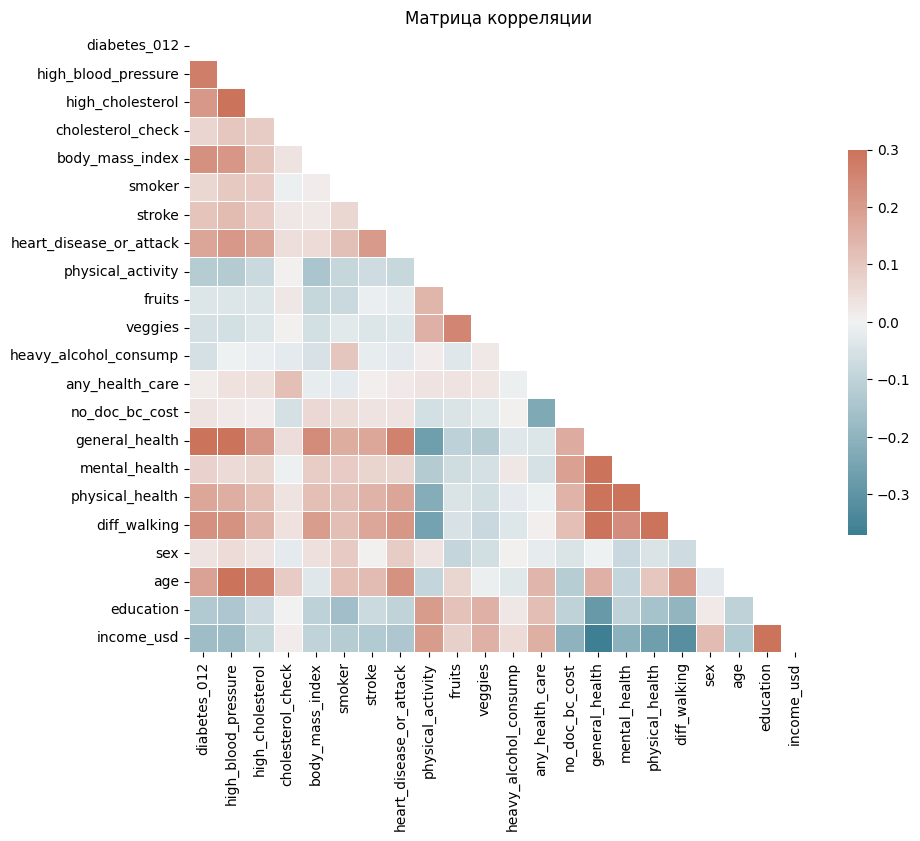

In [19]:
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 10))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, 
            vmax=0.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Матрица корреляции")
plt.show()

In [20]:
map_age_standart = pd.read_csv('/Users/geramukaeva/Documents/Учеба/DataStudy/Итоговый проект/lancet/NCD_RisC_Lancet_2024_Diabetes_age_standardised_countries.csv')

In [21]:
map_age_standart = map_age_standart[(map_age_standart['Year']>=2010) & (map_age_standart['Year']<=2015)]

In [22]:
map_age_standart

,Country/Region/World,ISO,Sex,Year,Age,Prevalence of diabetes (18+ years),Prevalence of diabetes (18+ years) lower 95% uncertainty interval,Prevalence of diabetes (18+ years) upper 95% uncertainty interval,Proportion of people with diabetes who were treated (30+ years),Proportion of people with diabetes who were treated (30+ years) lower 95% uncertainty interval,Proportion of people with diabetes who were treated (30+ years) upper 95% uncertainty interval
20,Afghanistan,AFG,Men,2010,Age-standardised,0.162883,0.092428,0.248763,0.231176,0.123642,0.367719
21,Afghanistan,AFG,Men,2011,Age-standardised,0.166996,0.098215,0.249831,0.230541,0.127051,0.360298
22,Afghanistan,AFG,Men,2012,Age-standardised,0.171170,0.104496,0.250827,0.229964,0.129207,0.353817
23,Afghanistan,AFG,Men,2013,Age-standardised,0.175532,0.110547,0.251910,0.229395,0.131032,0.346448
24,Afghanistan,AFG,Men,2014,Age-standardised,0.180089,0.116304,0.254069,0.228765,0.132819,0.340458
...,...,...,...,...,...,...,...,...,...,...,...
13188,Zimbabwe,ZWE,Women,2011,Age-standardised,0.114840,0.068037,0.176656,0.198886,0.070876,0.385417
13189,Zimbabwe,ZWE,Women,2012,Age-standardised,0.114684,0.065379,0.181535,0.201219,0.073122,0.390159
13190,Zimbabwe,ZWE,Women,2013,Age-standardised,0.114688,0.062395,0.186914,0.203597,0.074561,0.393758
13191,Zimbabwe,ZWE,Women,2014,Age-standardised,0.114893,0.059752,0.192695,0.206035,0.074721,0.398640


In [23]:
map_age_standart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400 entries, 20 to 13192
Data columns (total 11 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Country/Region/World                                                                            2400 non-null   object 
 1   ISO                                                                                             2400 non-null   object 
 2   Sex                                                                                             2400 non-null   object 
 3   Year                                                                                            2400 non-null   int64  
 4   Age                                                                                             2400 non-null   object 
 5   Prevalence of di

In [24]:
map_age_standart = map_age_standart[['Country/Region/World', 'Sex', 'Year', 'Prevalence of diabetes (18+ years)', 'Proportion of people with diabetes who were treated (30+ years)']]

In [25]:
# переименование столбцов

map_age_standart.rename(columns=
                               {'Country/Region/World': 'country',
                                'Sex': 'sex',
                                'Year': 'year',
                                'Prevalence of diabetes (18+ years)': 'prevalence_of_diabetes_age>18',
                                'Proportion of people with diabetes who were treated (30+ years)': 'proportion_of_people_with_diabetes_who_were_treated_age>30'
                                },
                               inplace=True)

/var/folders/1l/71q0z8wj5jxg_4mp56f503g40000gn/T/ipykernel_5892/2253593079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_age_standart.rename(columns=


In [26]:
map_age_standart['year'] = pd.to_datetime(map_age_standart['year'].astype(str) + '-01-01')

/var/folders/1l/71q0z8wj5jxg_4mp56f503g40000gn/T/ipykernel_5892/3683276015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_age_standart['year'] = pd.to_datetime(map_age_standart['year'].astype(str) + '-01-01')


In [27]:
diabetes_map_2010_2015 = map_age_standart

In [28]:
diabetes_map_2010_2015.head()

,country,sex,year,prevalence_of_diabetes_age>18,proportion_of_people_with_diabetes_who_were_treated_age>30
20,Afghanistan,Men,2010-01-01,0.162883,0.231176
21,Afghanistan,Men,2011-01-01,0.166996,0.230541
22,Afghanistan,Men,2012-01-01,0.171170,0.229964
23,Afghanistan,Men,2013-01-01,0.175532,0.229395
24,Afghanistan,Men,2014-01-01,0.180089,0.228765


In [29]:
diabetes_map_2010_2015.country = diabetes_map_2010_2015.country.replace({
    "Cote d'Ivoire": 'Ivory Coast',
    'Guinea Bissau': 'Guinea-Bissau',
    'Lao PDR': 'Laos'
    })

/var/folders/1l/71q0z8wj5jxg_4mp56f503g40000gn/T/ipykernel_5892/132883498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_map_2010_2015.country = diabetes_map_2010_2015.country.replace({


In [30]:
diabetes_map_2010_2015.head()

,country,sex,year,prevalence_of_diabetes_age>18,proportion_of_people_with_diabetes_who_were_treated_age>30
20,Afghanistan,Men,2010-01-01,0.162883,0.231176
21,Afghanistan,Men,2011-01-01,0.166996,0.230541
22,Afghanistan,Men,2012-01-01,0.171170,0.229964
23,Afghanistan,Men,2013-01-01,0.175532,0.229395
24,Afghanistan,Men,2014-01-01,0.180089,0.228765


In [31]:
diabetes_map_2010_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400 entries, 20 to 13192
Data columns (total 5 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   country                                                     2400 non-null   object        
 1   sex                                                         2400 non-null   object        
 2   year                                                        2400 non-null   datetime64[ns]
 3   prevalence_of_diabetes_age>18                               2400 non-null   float64       
 4   proportion_of_people_with_diabetes_who_were_treated_age>30  2400 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 112.5+ KB


In [32]:
geopoligon = pd.read_csv('/Users/geramukaeva/Documents/Учеба/DataStudy/Итоговый проект/geo_for_datalens2/all_country_borders.csv', sep=';', quotechar='"')

In [33]:
geopoligon = geopoligon[(geopoligon['coords_type']=='all_country_borders_poly')]

In [34]:
geopoligon.head()

,name_ru,name_en,coords_type,coords
0,Польша,Poland,all_country_borders_poly,"[[[55.0338306,18.366366700000015],[55.0063306,..."
1,Дания,Denmark,all_country_borders_poly,"[[[55.1476253,14.3443989],[55.4916387,14.85030..."
2,Германия,Germany,all_country_borders_poly,"[[[50.5973695,6.2461937],[50.5978889,6.248485]..."
3,Швеция,Sweden,all_country_borders_poly,"[[[57.3348282,17.6814016],[57.5714347,17.73773..."
4,Фарерские острова,Faroe Islands,all_country_borders_poly,"[[[62.5958399,-6.569739],[62.5845442,-6.416468..."


In [35]:
geopoligon.name_en = geopoligon.name_en.replace({
    'Russia': 'Russian Federation',
    'Democratic Republic of the Congo': 'DR Congo',
    'Congo-Brazzaville': 'Congo',
    "Côte d'Ivoire": 'Ivory Coast',
    'Turkey': 'Turkiye', 
    'United States': 'United States of America',
    'Vietnam': 'Viet Nam', 
    'The Bahamas': 'Bahamas', 
    'Brunei': 'Brunei Darussalam', 
    'Cape Verde': 'Cabo Verde',
    'The Gambia': 'Gambia',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Syria': 'Syrian Arab Republic',
    'East Timor': 'Timor-Leste',
    })

In [36]:
diabetes_map_2010_2015_coord = pd.merge(diabetes_map_2010_2015, geopoligon, left_on='country', right_on='name_en', how='left')

In [37]:
diabetes_map_2010_2015_coord.head()

,country,sex,year,prevalence_of_diabetes_age>18,proportion_of_people_with_diabetes_who_were_treated_age>30,name_ru,name_en,coords_type,coords
0,Afghanistan,Men,2010-01-01,0.162883,0.231176,Афганистан,Afghanistan,all_country_borders_poly,"[[[36.925945,73.841253],[36.890824,73.815059],..."
1,Afghanistan,Men,2011-01-01,0.166996,0.230541,Афганистан,Afghanistan,all_country_borders_poly,"[[[36.925945,73.841253],[36.890824,73.815059],..."
2,Afghanistan,Men,2012-01-01,0.171170,0.229964,Афганистан,Afghanistan,all_country_borders_poly,"[[[36.925945,73.841253],[36.890824,73.815059],..."
3,Afghanistan,Men,2013-01-01,0.175532,0.229395,Афганистан,Afghanistan,all_country_borders_poly,"[[[36.925945,73.841253],[36.890824,73.815059],..."
4,Afghanistan,Men,2014-01-01,0.180089,0.228765,Афганистан,Afghanistan,all_country_borders_poly,"[[[36.925945,73.841253],[36.890824,73.815059],..."


In [38]:
diabetes_map_2010_2015_coord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   country                                                     2400 non-null   object        
 1   sex                                                         2400 non-null   object        
 2   year                                                        2400 non-null   datetime64[ns]
 3   prevalence_of_diabetes_age>18                               2400 non-null   float64       
 4   proportion_of_people_with_diabetes_who_were_treated_age>30  2400 non-null   float64       
 5   name_ru                                                     2292 non-null   object        
 6   name_en                                                     2292 non-null   object        
 7   coords_type              

In [39]:
diabetes_map_2010_2015_coord = diabetes_map_2010_2015_coord[['country', 'sex', 'year', 'prevalence_of_diabetes_age>18', 'proportion_of_people_with_diabetes_who_were_treated_age>30', 'name_ru', 'coords']]

In [40]:
diabetes_map_2010_2015_coord.shape

(2400, 7)

In [41]:
diabetes_map_2010_2015_coord = diabetes_map_2010_2015_coord[~(diabetes_map_2010_2015_coord['coords'].isnull()) | (diabetes_map_2010_2015_coord['coords'] == '')]

In [42]:
diabetes_map_2010_2015_coord.shape

(2292, 7)

In [43]:
diabetes_map_2010_2015_coord.head()

,country,sex,year,prevalence_of_diabetes_age>18,proportion_of_people_with_diabetes_who_were_treated_age>30,name_ru,coords
0,Afghanistan,Men,2010-01-01,0.162883,0.231176,Афганистан,"[[[36.925945,73.841253],[36.890824,73.815059],..."
1,Afghanistan,Men,2011-01-01,0.166996,0.230541,Афганистан,"[[[36.925945,73.841253],[36.890824,73.815059],..."
2,Afghanistan,Men,2012-01-01,0.171170,0.229964,Афганистан,"[[[36.925945,73.841253],[36.890824,73.815059],..."
3,Afghanistan,Men,2013-01-01,0.175532,0.229395,Афганистан,"[[[36.925945,73.841253],[36.890824,73.815059],..."
4,Afghanistan,Men,2014-01-01,0.180089,0.228765,Афганистан,"[[[36.925945,73.841253],[36.890824,73.815059],..."


In [45]:
diabetes_map_2010_2015_coord.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2292 entries, 0 to 2399
Data columns (total 7 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   country                                                     2292 non-null   object        
 1   sex                                                         2292 non-null   object        
 2   year                                                        2292 non-null   datetime64[ns]
 3   prevalence_of_diabetes_age>18                               2292 non-null   float64       
 4   proportion_of_people_with_diabetes_who_were_treated_age>30  2292 non-null   float64       
 5   name_ru                                                     2292 non-null   object        
 6   coords                                                      2292 non-null   object        
dtypes: datetime64[ns](1), float64(

In [44]:
diabetes_map_2010_2015_coord.to_csv('diabetes_map_2010_2015_coord.csv', index=False)